# Step 1: EDA

In [5]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# needed to use matplotlib inside jupyter notebook
%matplotlib inline 

In [6]:
df_ = pd.read_csv("data/train.csv")
df_.head(10)

,observation_id,Type,Date,Part of a policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,station
0,2e4d0094-c30b-471b-a211-72a9790feca2,Person search,2020-12-01T01:10:00+00:00,NaN,50.798824,-1.089471,Male,25-34,Other ethnic group - Not stated,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,Community resolution,False,False,hampshire
1,4779fbe8-6e05-4534-85fd-db32952ee309,Person search,2020-12-01T02:00:00+00:00,NaN,50.785099,-1.091540,Male,over 34,White - Any other White background,Other,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False,hampshire
2,cb5c685d-acac-42e2-914d-75e6ff73b0a8,Person search,2020-12-01T09:15:00+00:00,NaN,50.952006,-1.403341,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,True,hampshire
3,f486e116-5b1e-45db-9931-a7f070c5c478,Person search,2020-12-01T10:20:00+00:00,NaN,50.806383,-1.079844,Male,10-17,Other ethnic group - Not stated,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,False,False,hampshire
4,78f4020e-12cc-4889-bf1a-2f2c29b2f662,Person search,2020-12-01T10:24:00+00:00,NaN,50.806670,-1.081982,Male,10-17,Other ethnic group - Not stated,Asian,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,False,False,hampshire
5,769ac39b-cfe7-4587-855f-b574cdd46933,Person search,2020-12-01T10:30:00+00:00,NaN,50.808359,-1.079465,Male,18-24,Mixed/Multiple ethnic groups - White and Black...,Black,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Arrest,False,False,hampshire
6,2f3c1b3b-b41a-4b12-b1ab-3c34f93cd20a,Person search,2020-12-01T10:50:00+00:00,NaN,50.914047,-1.401123,Male,over 34,Black/African/Caribbean/Black British - Any ot...,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,True,hampshire
7,b3f957b8-b942-4789-b47c-aa1a6dfcabe7,Person search,2020-12-01T11:00:00+00:00,NaN,50.915304,-1.398959,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False,hampshire
8,79807773-d027-4cdf-ad41-531b3bb2cbab,Person search,2020-12-01T11:10:00+00:00,NaN,50.830251,-1.077629,Male,18-24,Black/African/Caribbean/Black British - Caribbean,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,False,False,hampshire
9,fa5f250a-08f0-411d-85ff-eeaab9659cb5,Person search,2020-12-01T11:10:00+00:00,NaN,50.830251,-1.077629,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False,hampshire


In [11]:
print("The dataset has " + str(len(df_)) + " records.")
print("The dataset has " + str(df_["observation_id"].nunique()) + " unique observation_ids.")

The dataset has 856610 records.
The dataset has 856610 unique observation_ids.


Text(0.5, 1.0, '# of Null Values')

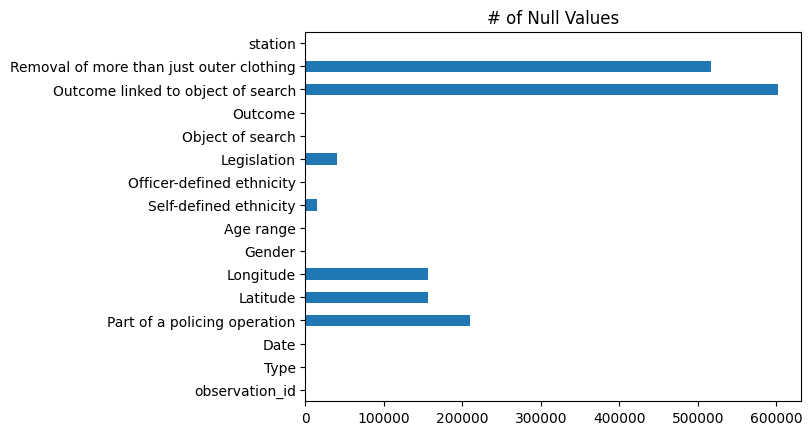

In [33]:
df_.isna().sum().plot.barh()
plt.title("# of Null Values")

In [37]:
print("The list of unique values in Type is :" + str(list(df_["Type"].unique())))
df_["Type"].value_counts(include_na)()

The list of unique values in Type is :['Person search', 'Person and Vehicle search', 'Vehicle search']


Person search                637921
Person and Vehicle search    217570
Vehicle search                 1119
Name: Type, dtype: int64

In [13]:
df_["Part of a policing operation"].unique()

array([nan, False, True], dtype=object)

In [14]:
df_["Gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [18]:
df_["Age range"].unique()

array(['25-34', 'over 34', '10-17', '18-24', 'under 10'], dtype=object)

In [19]:
df_["Self-defined ethnicity"].unique()

array(['Other ethnic group - Not stated',
       'White - Any other White background',
       'White - English/Welsh/Scottish/Northern Irish/British',
       'Mixed/Multiple ethnic groups - White and Black African',
       'Black/African/Caribbean/Black British - Any other Black/African/Caribbean background',
       'Black/African/Caribbean/Black British - Caribbean',
       'Asian/Asian British - Any other Asian background',
       'Asian/Asian British - Indian',
       'Asian/Asian British - Bangladeshi',
       'Black/African/Caribbean/Black British - African', 'White - Irish',
       'Other ethnic group - Any other ethnic group',
       'Mixed/Multiple ethnic groups - White and Asian',
       'Asian/Asian British - Chinese',
       'Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background',
       'Mixed/Multiple ethnic groups - White and Black Caribbean',
       'Asian/Asian British - Pakistani',
       'White - Gypsy or Irish Traveller', nan,
       'Other ethnic

In [20]:
df_["Officer-defined ethnicity"].unique()

array(['White', 'Other', 'Asian', 'Black', 'Mixed'], dtype=object)

In [21]:
df_["Legislation"].unique()

array(['Police and Criminal Evidence Act 1984 (section 1)',
       'Misuse of Drugs Act 1971 (section 23)',
       'Firearms Act 1968 (section 47)',
       'Poaching Prevention Act 1862 (section 2)',
       'Psychoactive Substances Act 2016 (s36(2))',
       'Criminal Justice and Public Order Act 1994 (section 60)',
       'Criminal Justice Act 1988 (section 139B)', nan,
       'Psychoactive Substances Act 2016 (s37(2))',
       'Wildlife and Countryside Act 1981 (section 19)',
       'Aviation Security Act 1982 (section 27(1))',
       'Public Stores Act 1875 (section 6)',
       'Hunting Act 2004 (section 8)',
       'Environmental Protection Act 1990 (section 34B )',
       'Customs and Excise Management Act 1979 (section 163)',
       'Police and Criminal Evidence Act 1984 (section 6)',
       'Conservation of Seals Act 1970 (section 4)',
       'Crossbows Act 1987 (section 4)', 'Deer Act 1991 (section 12)',
       'Protection of Badgers Act 1992 (section 11)'], dtype=object)

In [22]:
df_["Object of search"].unique()

array(['Article for use in theft', 'Controlled drugs', 'Stolen goods',
       'Offensive weapons', 'Anything to threaten or harm anyone',
       'Articles for use in criminal damage', 'Firearms',
       'Game or poaching equipment', 'Psychoactive substances',
       'Fireworks', 'Evidence of offences under the Act',
       'Goods on which duty has not been paid etc.',
       'Detailed object of search unavailable', 'Crossbows',
       'Evidence of wildlife offences',
       'Evidence of hunting any wild mammal with a dog',
       'Seals or hunting equipment'], dtype=object)

In [23]:
df_["Outcome"].unique()

array(['Community resolution', 'A no further action disposal', 'Arrest',
       'Summons / charged by post', 'Caution (simple or conditional)',
       'Penalty Notice for Disorder', 'Khat or Cannabis warning'],
      dtype=object)

## Notes on Outcomes
- **Community resolution**: Community resolutions are frequently used by police to deal with low-level offending. If you accept a community resolution, you are not prosecuted and therefore not required to attend court. ([from this page](https://www.bindmans.com/knowledge-hub/blogs/what-are-community-resolutions/))
- **A no further action disposal**
- **Arrest**
- **Summons / charged by post**
- **Caution (simple or conditional)**: A police caution is a formal alternative to prosecution in minor cases, administered by the police in England and Wales. It is commonly used to resolve cases where full prosecution is not seen as the most appropriate solution.[1] Accepting a caution requires an admission of guilt. ([from wikipedia](https://en.wikipedia.org/wiki/Police_caution))
- **Penalty Notice for Disorder**
- **Khat or Cannabis warning**

In [24]:
df_["Outcome linked to object of search"].unique()

array([False, True, nan], dtype=object)

In [25]:
df_["Removal of more than just outer clothing"].unique()

array([False, True, nan], dtype=object)

In [26]:
df_["station"].unique()

array(['hampshire', 'sussex', 'south-yorkshire', 'staffordshire',
       'bedfordshire', 'cumbria', 'nottinghamshire', 'warwickshire',
       'devon-and-cornwall', 'leicestershire', 'durham', 'humberside',
       'thames-valley', 'norfolk', 'lincolnshire', 'northamptonshire',
       'kent', 'wiltshire', 'city-of-london', 'west-mercia', 'lancashire',
       'cheshire', 'derbyshire', 'btp', 'surrey', 'hertfordshire',
       'north-yorkshire', 'cambridgeshire', 'metropolitan', 'northumbria',
       'west-yorkshire', 'north-wales', 'cleveland', 'gloucestershire',
       'avon-and-somerset', 'dorset', 'suffolk', 'dyfed-powys',
       'west-midlands', 'merseyside', 'essex'], dtype=object)

In [17]:
df_.columns

Index(['observation_id', 'Type', 'Date', 'Part of a policing operation',
       'Latitude', 'Longitude', 'Gender', 'Age range',
       'Self-defined ethnicity', 'Officer-defined ethnicity', 'Legislation',
       'Object of search', 'Outcome', 'Outcome linked to object of search',
       'Removal of more than just outer clothing', 'station'],
      dtype='object')